## Importations

In [2]:
## for plotting figures :
import matplotlib.pyplot as plt
from matplotlib import rc
import sys
sys.path.append('../')


import os
import csv
import pandas as pd


rc('font', family='sans-serif', size = 7)
rc('figure', dpi= 700)
rc(('xtick', 'ytick'), labelsize = 7)
rc('legend', fontsize=6)
rc('lines', linewidth = 1)
rc('axes', linewidth = 0.5, labelsize =8)
rc('legend', handlelength = 2)

In [3]:
df = pd.read_excel('../tables/data/table_smiles_FIA.xlsx')


In [34]:
df.iloc[0]["Species"]

'$BH_3$'

In [5]:
os.getcwd()

'C:\\Users\\Juliette\\Desktop\\stage_M2\\analyses'

In [6]:
from matplotlib import rc
import matplotlib.pyplot as plt

##Initiate
rc('font', family='cambria', size = 40)
rc('lines', linewidth = 2)
rc('figure', dpi= 400)
rc(('xtick', 'ytick'), labelsize = 35)
rc('grid', lw = 5)
rc('legend', fontsize= 30)

def Replace(x) :
    if isinstance(x, str) :
        return 0
    else: 
        return x

methods = list(df.columns)[2:]
N = len(methods)
width = 0.7/N

fig = plt.figure(figsize = (30, 17.5))
ax =  fig.subplots()

fia_ref = list(df['Réf. Data'])

for n in range(N-1) :  
    meth = methods[n]
    mols = list(df["Species"])
    fia = list(df[meth])
    fia = list(map(Replace, fia))
    delta_fia = []
    for i in range(len(fia)):
        if fia[i]==0:
            delta_fia.append(0)
        else : 
            delta_fia.append(fia[i]-fia_ref[i])
        
    num = list(range(len(fia)))
    
    
    axis = lambda x : x - width * ((N+1)/2 - (n))
    
    #print(num, fia)
    #ax.plot(num, fia, ls = 'none', marker = 'o')
    cbar = ax.bar(list(map(axis, num)), delta_fia, width = width)
    cbar.set_label(meth)
    
ax.set_xticks(num)
ax.set_xticklabels(mols)
plt.xticks(rotation=45)


ax.set_xlabel('Molécule')
ax.set_ylabel('FIA - FIA réf (kJ/mol)')

fig.legend()
fig.tight_layout()

fig.savefig('figures/delta_fia_methods.svg',facecolor = 'white', transparent = False, format = 'svg')
#fig.savefig('delta_fia_methods.png',facecolor = 'white', transparent = False, format = 'png', dpi = 600)

In [5]:
os.getcwd()

'C:\\Users\\Juliette\\Desktop\\stage_M2\\analyses'

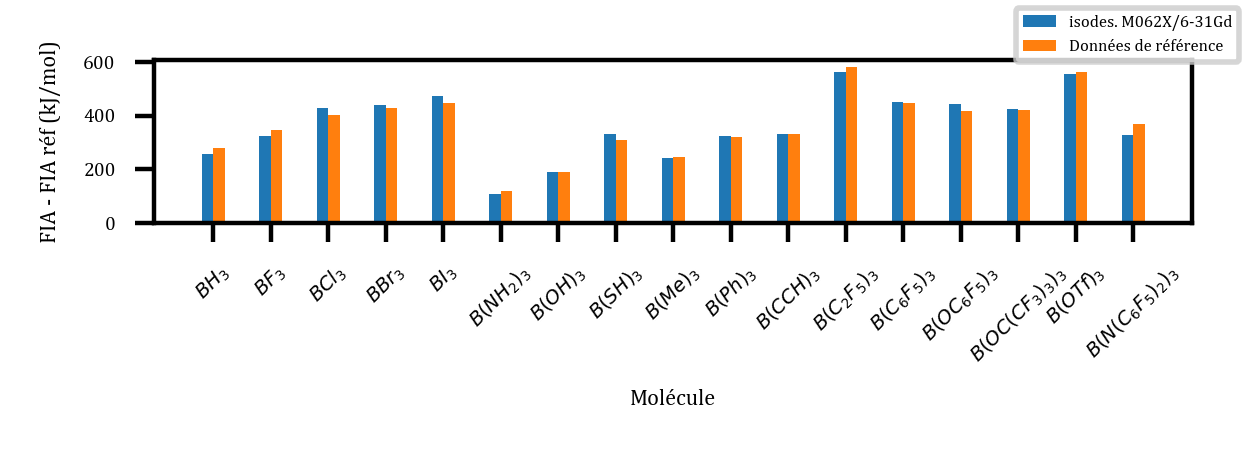

In [6]:
from matplotlib import rc
import matplotlib.pyplot as plt

##Initiate
rc('font', family='cambria', size = 40)

rc('figure', dpi= 400)
rc(('xtick', 'ytick'), labelsize = 35)

rc('legend', fontsize=30)


fig = plt.figure(figsize = (30, 10))
ax =  fig.subplots()

fia_ref = list(df['Réf. Data'])
fia = list(df["isodes. M062X/6-31Gd"])
mols = list(df["Species"])
num = list(range(len(fia)))

width = 0.2

axis = lambda x : x - width * (1/2 - (n))
n=0

ax.bar(list(map(axis, num)), fia, label = "isodes. M062X/6-31Gd", width = 0.2)
n=1
ax.bar(list(map(axis, num)), fia_ref, label = "Données de référence", width = 0.2)

    #print(num, fia)
    #ax.plot(num, fia, ls = 'none', marker = 'o')
    #cbar = ax.bar(list(map(axis, num)), delta_fia, width = width)
    #cbar.set_label(meth)
    
ax.set_xticks(num)
ax.set_xticklabels(mols, rotation = 45)

ax.set_xlabel('Molécule')
ax.set_ylabel('FIA (kJ/mol)')

fig.legend()
fig.tight_layout()

#fig.savefig('data_fia_methods.svg',facecolor = 'white', transparent = False, format = 'svg')
#fig.savefig('data_FIA_methods.png',facecolor = 'white', transparent = False, format = 'png')

fit coefficients : slope =  0.990715349467433 intercept =  -6.665171687609398
R2 = 0.9953664461845213
MAE = 7.810117127779894



fit coefficients : slope =  0.9746313812067502 intercept =  13.948536477166058
R2 = 0.9969349035758801
MAE = 5.725730274147149



fit coefficients : slope =  1.0480468732696142 intercept =  -15.855761683124143
R2 = 0.9817191482285826
MAE = 15.071428028328434



fit coefficients : slope =  1.016834800059237 intercept =  -6.443462666534702
R2 = 0.9764818278584989
MAE = 14.352945675877308



<_io.TextIOWrapper name='fit_table.csv' mode='w' encoding='cp1252'>


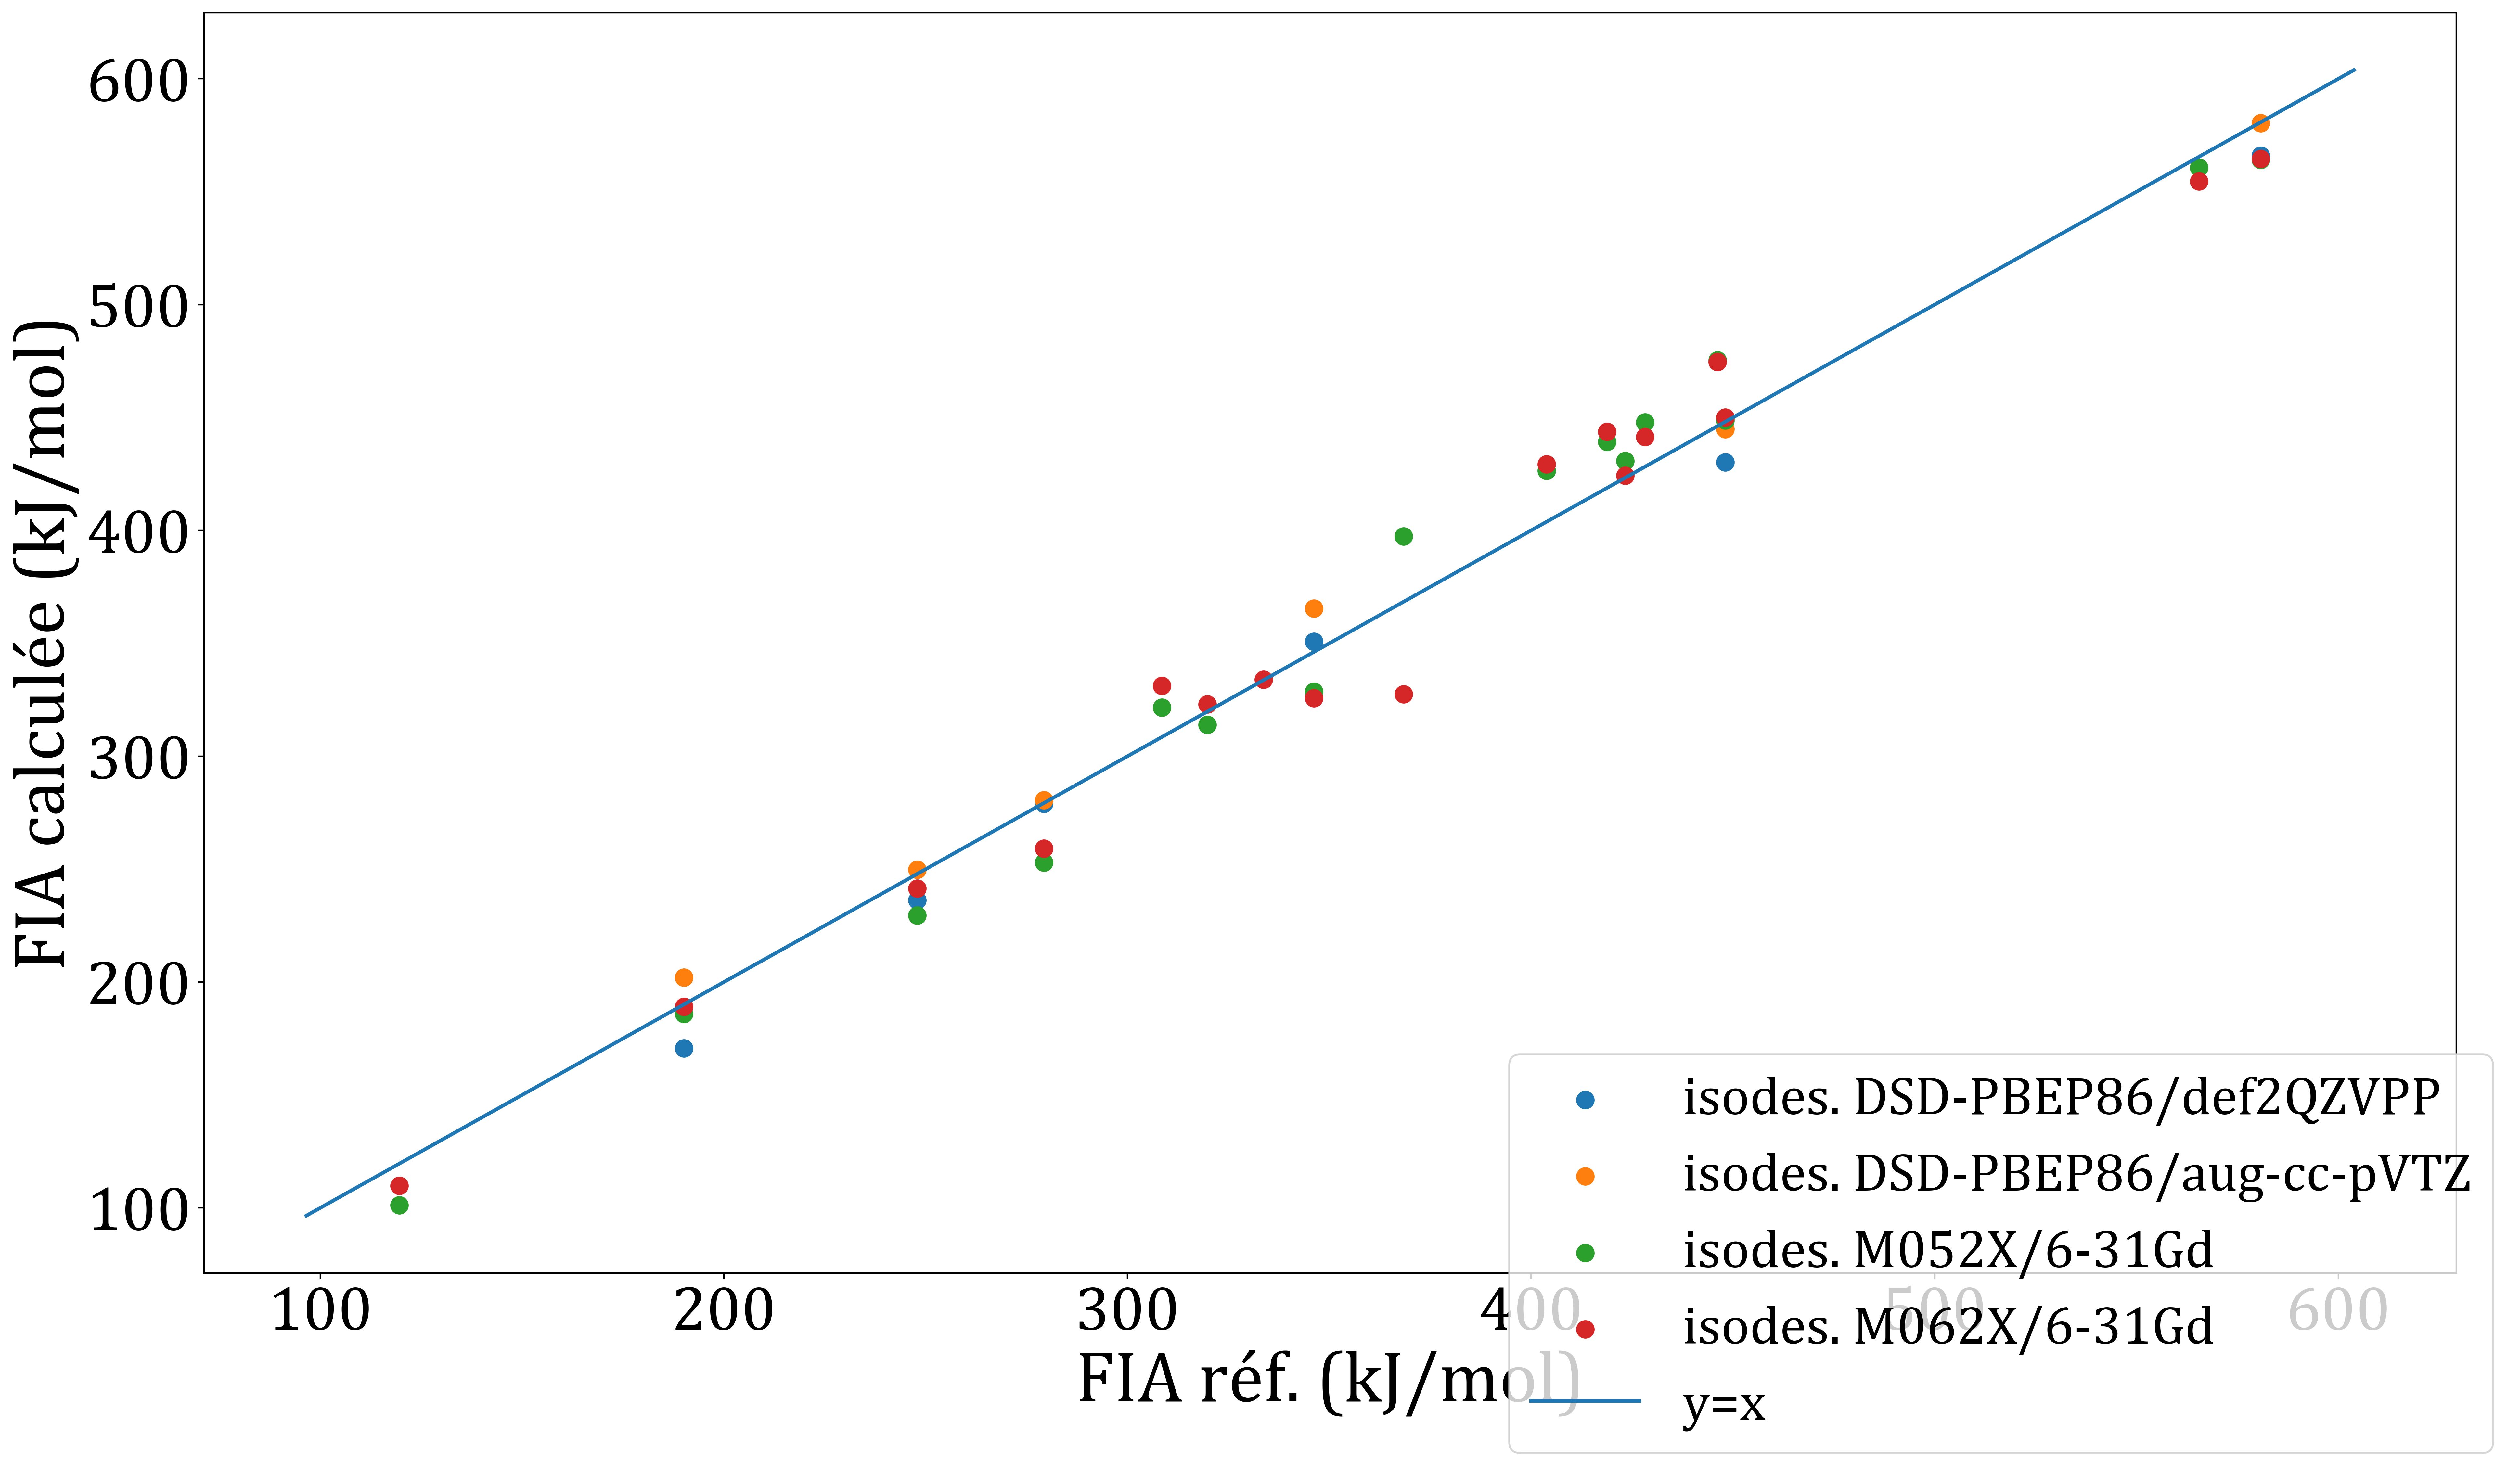

In [7]:
from matplotlib import rc
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

##Initiate
rc('font', family='cambria', size = 40)
rc('lines', linewidth = 2)
rc('figure', dpi= 400)
rc(('xtick', 'ytick'), labelsize = 35)

rc('legend', fontsize=30)

remove =['non isodes. CCSD(T)/cc-pVQZ', 'non isodes. CCSD(T)/aug-cc-pVQZ']
methods = list(df.columns)[2:]
fields = ['Method']+methods
rows = [['slope'], ['intercept'], ['R2'], ['MAE']]

def Replace(x) :
    if x==0 :
        return None
    else: 
        return x


fig = plt.figure(figsize = (20, 12)) #créer un espace figure
ax =  fig.subplots() #créer les axes

fia_ref = list(df['Réf. Data'])
N = len(methods)

for n in range(N-1) :  
    meth = methods[n]
    if meth not in remove :
    
        mols = list(df["Species"])
        fia = list(df[meth])
        fia = list(map(Replace, fia))
        num = list(range(len(fia)))

        pts = plt.scatter(x=fia_ref, y=fia, s=85, label = methods[n])
        #set_label(labels[n])
        #np.polyfit(fia_ref, fia, 1,rcond=None, full=False, w=None, cov=False)
        fia_values = []
        fia_ref_values = []
        for i in range(len(fia)):
            if type(fia[i]) == float : 
                fia_values.append(fia[i])
                fia_ref_values.append(fia_ref[i])
        #print(fia_values)
        #print(fia_ref_values)
        z = np.polyfit(fia_ref_values, fia_values, 1)
        print("fit coefficients :", 'slope = ', z[0], "intercept = ", z[1])
        rows[0].append(round(z[0],2))
        rows[1].append(round(z[1],2))
        p = np.poly1d(z)
        R2 = r2_score(fia_values, p(fia_ref_values))
        print("R2 =", R2)
        rows[2].append(round(R2,3))
        MAE = mean_absolute_error(fia_values, p(fia_ref_values))
        rows[3].append(round(MAE,2))
        print("MAE =", MAE)    
        print("\n\n")

xlims = ax.get_xlim()
ax.plot(xlims, xlims, label = "y=x")

ax.set_xlabel('FIA réf. (kJ/mol)')
ax.set_ylabel('FIA calculée (kJ/mol)')

fig.legend(loc = "lower right")
fig.tight_layout()

fig.savefig('figures/fit_fia_methods.svg', facecolor = 'white', transparent = False, format = 'svg')
#fig.savefig('fit_fia_methods.png', facecolor = 'white', transparent = False, format = 'png')

filename = "fit_table.csv"

with open(filename,'w',newline = '') as csvfile :
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(fields)
    csvwriter.writerows(rows)
    
print(csvfile)

In [8]:
from matplotlib import rc
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

##Initiate
rc('font', family='cambria', size = 35)
rc('lines', linewidth = 2)
rc('figure', dpi= 400)
rc(('xtick', 'ytick'), labelsize = 25)

rc('legend', fontsize=35)

remove =['non isodes. CCSD(T)/cc-pVQZ', 'non isodes. CCSD(T)/aug-cc-pVQZ']
methods = list(df.columns)[2:]
fields = ['Method']+methods
rows = [['slope'], ['intercept'], ['R2'], ['MAE']]

def Replace(x) :
    if x==0 :
        return None
    else: 
        return x


fig = plt.figure(figsize = (24, 16)) #créer un espace figure
ax =  fig.subplots() #créer les axes

fia_ref = list(df['Réf. Data'])
N = len(methods)

for n in range(N-1) :  
    meth = methods[n]
    if meth not in remove :
    
        mols = list(df["Species"])
        fia = list(df[meth])
        fia = list(map(Replace, fia))
        num = list(range(len(fia)))

        pts = plt.scatter(x=fia_ref, y=fia, s=64, label = methods[n])
        #set_label(labels[n])
        #np.polyfit(fia_ref, fia, 1,rcond=None, full=False, w=None, cov=False)
        fia_values = []
        fia_ref_values = []
        for i in range(len(fia)):
            if type(fia[i]) == float : 
                fia_values.append(fia[i])
                fia_ref_values.append(fia_ref[i])
        #print(fia_values)
        #print(fia_ref_values)
        z = np.polyfit(fia_ref_values, fia_values, 1)
        print("fit coefficients :", 'slope = ', z[0], "intercept = ", z[1])
        rows[0].append(round(z[0],2))
        rows[1].append(round(z[1],2))
        p = np.poly1d(z)
        R2 = r2_score(fia_values, fia_ref_values)
        print("R2 =", R2)
        rows[2].append(round(R2,3))
        MAE = mean_absolute_error(fia_values, fia_ref_values)
        rows[3].append(round(MAE,2))
        print("MAE =", MAE)    
        print("\n\n")

xlims = ax.get_xlim()
ax.plot(xlims, xlims, label = "y=x")

ax.set_xlabel('FIA réf. (kJ/mol)')
ax.set_ylabel('FIA calculée (kJ/mol)')

fig.legend(loc = "right")
fig.tight_layout()

fig.savefig('fit_fia_methods.svg', facecolor = 'white', transparent = False, format = 'svg')
#fig.savefig('fit_fia_methods.png', facecolor = 'white', transparent = False, format = 'png')

filename = "fit_table.csv"

with open(filename,'w',newline = '') as csvfile :
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(fields)
    csvwriter.writerows(rows)
    
print(csvfile)

fit coefficients : slope =  0.990715349467433 intercept =  -6.665171687609398
R2 = 0.9895351081167406
MAE = 11.43832641666667



fit coefficients : slope =  0.9746313812067502 intercept =  13.948536477166058
R2 = 0.9946818854879376
MAE = 6.318510283333334



fit coefficients : slope =  1.0480468732696142 intercept =  -15.855761683124143
R2 = 0.979443625376822
MAE = 15.909748112657685



fit coefficients : slope =  1.016834800059237 intercept =  -6.443462666534702
R2 = 0.9762088722551717
MAE = 14.530493506008998



<_io.TextIOWrapper name='fit_table.csv' mode='w' encoding='cp1252'>


In [59]:
methods = list(df.columns)[2:]
N= len(methods)

fields = ['Method']
row = ['MAE']
for n in range(N-1):
    meth = methods[n]
    fields.append(meth) 
    fia = list(df[meth])
    fia_values = []
    fia_ref_values = []
    for i in range(len(fia)):
        if fia[i]!=0:
            fia_values.append(fia[i])
            fia_ref_values.append(fia_ref[i])
    #print(fia_values)
    #print(fia_ref_values)
    MAE = round(mean_absolute_error(fia_ref_values, fia_values),2)
    #print(MAE)
    row.append(MAE)
print(fields)
print(row)

filename = "MAE_table.csv"

with open(filename,'w',newline = '') as csvfile :
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(fields)
    csvwriter.writerow(row)
    
print(csvfile)

['Method', 'non isodes. CCSD(T)/cc-pVQZ', 'non isodes. CCSD(T)/aug-cc-pVQZ', 'isodes. DSD-PBEP86/def2QZVPP', 'isodes. DSD-PBEP86/aug-cc-pVTZ', 'isodes. M052X/6-31Gd', 'isodes. M062X/6-31Gd']
['MAE', 11.98, 22.73, 11.44, 6.32, 15.91, 14.53]
<_io.TextIOWrapper name='MAE_table.csv' mode='w' encoding='cp1252'>
